# Basic Signal Processing

## 1. Introduction

So far, you have experienced many of the data type in ML/DL field.

Another kind of data is signal.

But what is signal?

[quote](https://en.wikipedia.org/wiki/Signal)
> In signal processing, a signal is a function that conveys information about a phenomenon.[1] **Any quantity that can vary over space or time can be used as a signal** to share messages between observers.[2] The IEEE Transactions on Signal Processing includes **audio, video, speech, image, sonar, and radar** as examples of signal.[3] A signal may also be defined as any **observable change in a quantity over space or time**, even if it does not carry information.[4]
>
> In nature, signals can be **actions done by an organism to alert other organisms**, ranging from the release of plant chemicals to warn nearby plants of a predator, to sounds or motions made by animals to alert other animals of food. Signaling occurs in all organisms even at cellular levels, with cell signaling. Signaling theory, in evolutionary biology, proposes that a substantial driver for evolution is the ability for animals to communicate with each other by developing ways of signaling. In human engineering, **signals are typically provided by a sensor**, and often the original form of a signal is converted to another form of energy using a transducer. For example, a microphone converts an acoustic signal to a voltage waveform, and a speaker does the reverse.[1]

[quote](https://x-engineer.org/signal/#:~:text=Mathematically%2C%20a%20signal%20is%20represented,continuous%2Dtime)
> A signal can be defined as an abstraction of any quantity that can be measured, which is function of at least one independent variable (time or space). A signal is the functional representation of a physical quantity or variable, and it contains information about the behavior of the physical quantity.
>
> Example of signals:
> 
>- electrical: voltage and current
>- mechanical: position and speed
>- hydraulic: pressure and flow

Ultimately, a signal is anything that can be represented in a function of time (*t*). Let's say we have a signal of a sine wave. 

$$ x(t) = sin( 2 \pi t + \phi) $$

where *t* is time and *$\phi$* is a pahse. *$\pi$* is a constant number of $\frac{22}{7}$.

Confuse?

Let's create this signal.

In [67]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


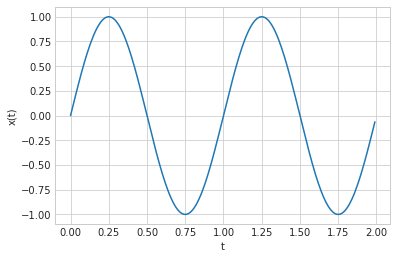

In [17]:
t = np.arange(0,2,1/100)
x = np.sin((2 * np.pi * t) + 0)

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

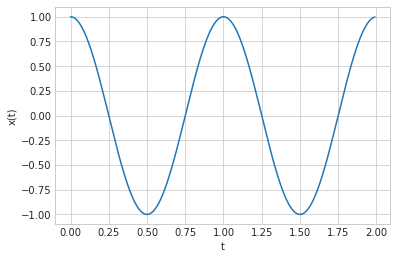

In [4]:
t = np.arange(0,2,1/100)
# Let's try a cos signal
x = np.cos((2 * np.pi * t) + 0)

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

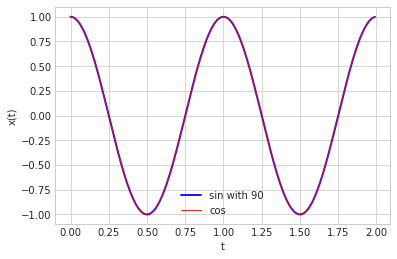

In [5]:
t = np.arange(0,2,1/100)
# Do you remember that sin + 90 degree is cos?
x_sin_90 = np.sin((2 * np.pi * t) + np.deg2rad(90))
x_cos = np.cos((2 * np.pi * t) + 0)

plt.plot(t,x_sin_90, color='blue', linestyle='-', linewidth=2, alpha=0.9, label='sin with 90')
plt.plot(t,x_cos, color='red', linestyle='-', linewidth=1, alpha=0.9, label='cos')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

"Ok. I got it. Signal is a wave. Go on."

No, wave is a subset of signal. Before we proceed, let's recall what is wave.

[quote](https://en.wikipedia.org/wiki/Wave)
> In physics, mathematics, and related fields, a wave is a propagating dynamic disturbance (change from equilibrium) of one or more quantities. **Waves can be periodic**, in which case those quantities oscillate repeatedly about an equilibrium (resting) value at some frequency. When the entire waveform moves in one direction, it is said to be a traveling wave; by contrast, a pair of superimposed periodic waves traveling in opposite directions makes a standing wave. In a standing wave, the amplitude of vibration has nulls at some positions where the wave amplitude appears smaller or even zero. Waves are often described by a wave equation (standing wave field of two opposite waves) or a one-way wave equation for single wave propagation in a defined direction.

The key of wave is it is periodic or predictable. When we observe a wave, we observe its oscillation, a.k.a. frequency.

The equation to the frequency is 

$$ f = \frac{1}{T}$$

Where *f* is frequency and $T$ is period.

Period is the time used in 1 cycle.

In another sense, a freqency is

$$ f = \frac{N}{t} $$

Where *N* is a number of cycles and *t* is time.

To fully understand this, let's draw an arbitrary sine wave and layout its properties.

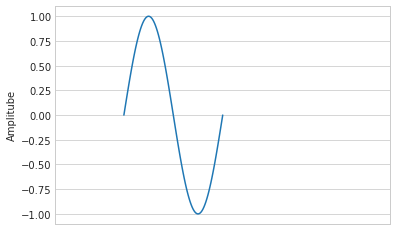

In [27]:
t = np.arange(0,1 + 1/100,1/100)
x_sin = np.sin((2 * np.pi * t) + 0)
plt.plot(t,x_sin)
plt.ylabel('Amplitube')
plt.axis('equal')
plt.xticks([])
plt.xlim(0,2)
plt.show()

Above is one cycle of sine wave (or cosine with phase of -90 degree). If we repeat this exact shape, it will be two cycles of sine wave.

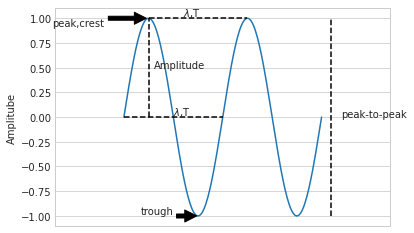

In [28]:
t = np.arange(0,2 + 1/100,1/100)
x_sin = np.sin((2 * np.pi * t) + 0)
plt.plot(t,x_sin)
plt.ylabel('Amplitube')
plt.axis('equal')
plt.xlim(0,2)

plt.plot([0.25,0.25],[0,1], color='black', linestyle="--")
plt.text(0.3,0.5,'Amplitude')
plt.hlines(y=0,xmin=0,xmax=1, color="black", linestyle="--")
plt.text(0.5,0.02,r'$\lambda$,T')
plt.hlines(y=1,xmin=0.25,xmax=1.25, color="black", linestyle="--")
plt.text(0.6,1.02,r'$\lambda$,T')

plt.vlines(x=2.1,ymin=-1,ymax=1, color="black", linestyle="--")
plt.text(2.2,0,r'peak-to-peak')

plt.annotate('peak,crest',xy=(0.25,1),
            xytext=(-0.2,1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
)
plt.annotate('trough',xy=(0.75,-1),
            xytext=(0.5,-0.9),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
)
plt.xticks([])
plt.show()

The $\lambda$ (lambda) is wavelength. Conveniently, both period (*T*) and wavelength ($\lambda$) are measured at the same places. 

Now that we have established the common term of a wave, let summarized.

- **Amplitude**: measure from the mean to the **crest** or **trough**. This value is also called **peak**.
- **peak-to-peak**: the difference between the maximum positive and the maximum negative amplitudes.
- **Period (*T*)**: The time that the wave used to complete 1 cycle. (Unit is second)
- **Wavelenght ($\lambda$)**: The space/distance the wave used to complete 1 cycle. (Unit is meter)
- **Frequncy (*f*)**: How many times the wave repeated in 1 second. The usual formula is $ f = \frac{1}{T}$. Unit is Hz (Hertz).

To find the frequency (*f*), the subject wave must be drawn in time domain or, in other words, the x-axis has to be time.

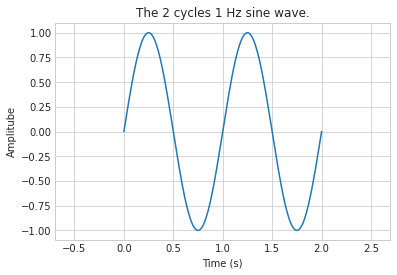

In [8]:
t = np.arange(0,2 + 1/100,1/100)
x_sin = np.sin((2 * np.pi * t) + 0)
plt.plot(t,x_sin)
plt.title("The 2 cycles 1 Hz sine wave.")
plt.xlabel('Time (s)')
plt.ylabel('Amplitube')
plt.axis('equal')
plt.xlim(0,2)

plt.show()

Now that we specify the x-axis as a time axis with unit of second. The wave we are looking at has a frequency of 1 Hz.

Why does the unit matter? It is because if we change the time unit from second to millisecond, the frequency now is 1000 Hz.

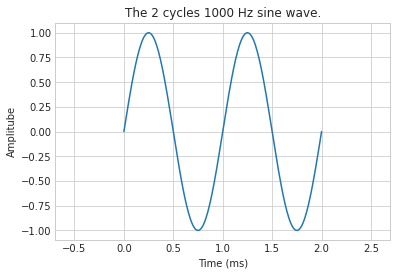

In [9]:
t = np.arange(0,2 + 1/100,1/100)
x_sin = np.sin((2 * np.pi * t) + 0)
plt.plot(t,x_sin)
plt.title("The 2 cycles 1000 Hz sine wave.")
plt.xlabel('Time (ms)')
plt.ylabel('Amplitube')
plt.axis('equal')
plt.xlim(0,2)

plt.show()

If you are confused, here is the converted/scaled version of the wave. 

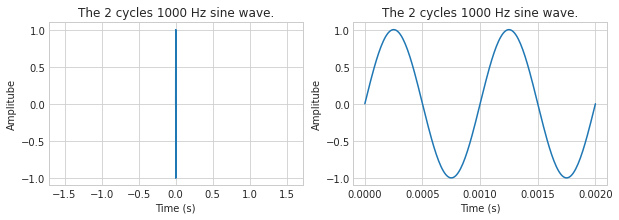

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3)) 
t = np.arange(0,2 + 1/100,1/100) / 1000
x_sin = np.sin((2 * np.pi * t * 1000) + 0)

# Plot the exact same waves but with/without zoom
ax[0].plot(t,x_sin)
ax[0].set_title("The 2 cycles 1000 Hz sine wave.")
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitube')
ax[0].axis('equal')

ax[1].plot(t,x_sin)
ax[1].set_title("The 2 cycles 1000 Hz sine wave.")
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitube')

plt.show()

## 2. Representing as wave

The shape we plotted so far is a sine wave, but what does it mean exactly? 

Observed the below GIF.

![alt](https://c.tenor.com/ZDQm6tcyVooAAAAC/simple-pendulum-pendulum.gif)

It is a GIF of a pendulum while it swings. Obviously, in the ideal world, the pendulum will swing from left to right and right to left forever because it never loses the power. Thus, the pendulum motion is predictable. We know from high school that the time it takes to swing from left to right and right to left is the same, and we know that the distance of the swing from left to right and right to left is the same. 

Now, if we want to capture the motion of this pendulum by attaching the pencil at the bottom of the pendulum and a paper below the pendulum (this won't work in the real world). We swing the pendulum and the pencil will record the motion. We start from holding the pendulum to the right and release it. This is what we get.

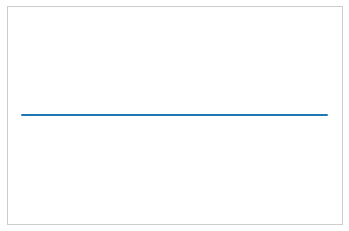

In [50]:
t = np.arange(0,2 + 1/100,1/100)
pendulum_motion = np.cos((2 * np.pi * t) + 0)
plt.plot(pendulum_motion, np.zeros(len(x)))
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.show()

Oh! In order to make this work, we have to move the paper in or out (perpendicular to the pendulum movement) at the constant speed.
Let's try again.

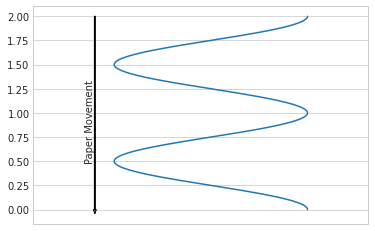

In [62]:
t = np.arange(0,2 + 1/100,1/100)
pendulum_motion = np.cos((2 * np.pi * t) + 0)
plt.plot(pendulum_motion, t)
plt.axis('equal')
plt.xticks([])
plt.arrow(x=-1.2, y=2, dx=0, dy=-2, width=0.01)
plt.text(s='Paper Movement',x=-1.3,y=0.5,rotation=90)
plt.show()

You can imagine a lot of other things can be represented in sine/cosine wave.

Now, are there any other waves that we can use to represent stuff. Sure there are. Let's take a look.

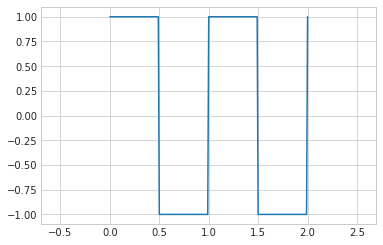

In [74]:
# Square Wave
t = np.arange(0,2 + 1/100, 1/100)
x = scipy.signal.square(2 * np.pi * t)
plt.plot(t, x)
plt.axis('equal')
plt.show()
# This maybe represent the direction of the pendulum, 1 of moving left and -1 for moving right.

(-0.1, 2.1, -1.099, 1.0790000000000002)

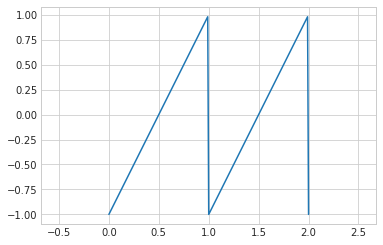

In [75]:
# sawtooth Wave
t = np.arange(0,2 + 1/100, 1/100)
x = scipy.signal.sawtooth(2 * np.pi * t)
plt.plot(t, x)
plt.axis('equal')

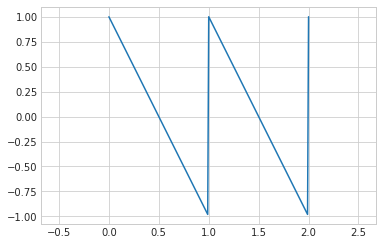

In [77]:
# sawtooth Wave
t = np.arange(0,2 + 1/100, 1/100)
x = scipy.signal.sawtooth(2 * np.pi * t, width=0)
plt.plot(t, x)
plt.axis('equal')
plt.show()

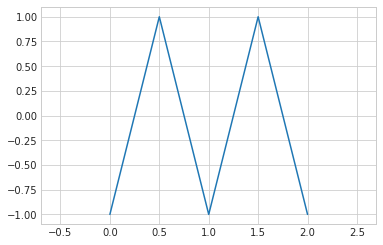

In [78]:
# Triangle Wave
t = np.arange(0,2 + 1/100, 1/100)
x = scipy.signal.sawtooth(2 * np.pi * t, width=0.5)
plt.plot(t, x)
plt.axis('equal')
plt.show()

These are the basic wave form that you should know.

Now, the fun is, most of the signals can be constructed from multiple sine/cosine wave.
For example, the square wave.

$$
x(t) = \frac{4}{\pi} \sum_{k=1}^{\infty} \frac{1}{2 k - 1} \sin \left( 2 \pi \left(2 k - 1 \right) t \right)
$$


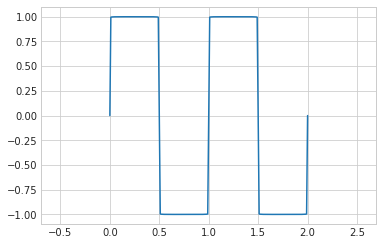

In [88]:
t = np.arange(0,2 + 1/100, 1/100)
x = np.zeros(len(t))
for i in np.arange(1,2000,2):
    x += 4/(np.pi*i) * np.sin(2 * np.pi * t * i)
plt.plot(t, x)
plt.axis('equal')
plt.show()

While the square is the sum of odd-integer frequency sine waves, the Sawtooth wave is all integer with some adjustment.

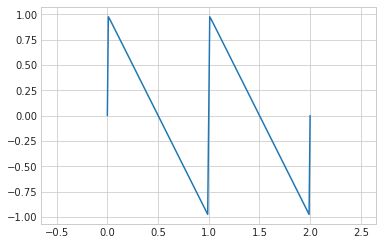

In [117]:
t = np.arange(0,2 + 1/100, 1/100)
x = np.zeros(len(t))
for i in np.arange(1,2000):
    x += -1**i * np.sin(2 * np.pi * t * i) / i
plt.plot(t, 2/(np.pi) * x * -1)
plt.axis('equal')
plt.show()

This is fun. Let's try triangle

$$ x_\mathrm{triangle}(t) = \frac8{\pi^2}\sum_{i=0}^{N - 1} (-1)^i n^{-2} \sin(2\pi f_0 n t) $$

where $n = 2i+1$

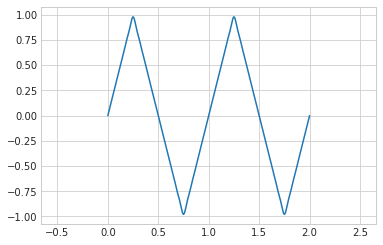

In [103]:
t = np.arange(0,2 + 1/100, 1/100)
x = np.zeros(len(t))
for i in np.arange(0,10,1):
    n = (2*i) + 1
    x += ((-1)**i)  * (1/(n**2)) * np.sin(2 * np.pi * t * n)
plt.plot(t, 8 * x / np.pi**2)
plt.axis('equal')
plt.show()

What does this mean? In the end, any periodic signal can be deconstructed into multiple sine/cosine wave.

This is the basis of Fourier Series and Fourier Transform.

## 3. Analog and Digital signal

One final basic of signal processing is digitizing the signal. For you, who are an audiophile nerd, you may recall to this process as a Digital-to-Analog Convertion (DAC). 

Now, you have to up your imagination game. When you see a graph of time, you have to see a motion.

![alt](https://i.gifer.com/7myU.gif)

Thus, a signal is strongly correlated to time. When we talk about signal, we talk about an event in a range of time not a point of time. This means when you are recording a signal, you are recording multiple data points mostly in an array format. 

If you still don't get the idea, then here are some example.

What is a video? A series of picture. 1 frame of a video is a picture.

Why do we recognize a motion in a video? Because the subject in the video is moving. 

Why do we know the subject is moving? Because the position of the subject changes throughout the video. 

Still don't get it? Look at the picture below and guess which direction does the left pendulum is moving?

![alt](https://www.markhamlawfirm.com/wp-content/uploads/2016/08/The-Pendulum-Begins-to-Swing-Back.jpg)

The answer is, I don't know. I copy the picture from the internet. The answer of left or right is not relevant because if the information is sufficient, everyone will know which direction it's moving toward.


To complete this, the order of the information is important. If I give you unordered images from the pendulum GIF and asked you to rearrange in the correct order, you will most likely fail.

![alt](https://c.tenor.com/ZDQm6tcyVooAAAAC/simple-pendulum-pendulum.gif)

The topic we are discussing so far is `sampling`.

### 3.1 Sampling

